In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import glob
import csv
import time
import pandas as pd
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.externals import joblib
# for scikit-learn <= 0.17 use:
from sklearn.cross_validation import train_test_split
# otherwise:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

/home/peng/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Loda the data
X_0 = np.load("./Load Data/X_train_0.npy")
X_1 = np.load("./Load Data/X_train_1.npy")
X_2 = np.load("./Load Data/X_train_2.npy")
X_3 = np.load("./Load Data/X_train_3.npy")
X_4 = np.load("./Load Data/X_train_4.npy")
X_5 = np.load("./Load Data/X_train_5.npy")
X_6 = np.load("./Load Data/X_train_6.npy")
X_7 = np.load("./Load Data/X_train_7.npy")
X_train = np.concatenate((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7))

X_test_0 = np.load("./Load Data/X_test_0.npy")
X_test_1 = np.load("./Load Data/X_test_1.npy")
X_test = np.concatenate((X_test_0, X_test_1))

X_valid = np.load("./Load Data/X_valid.npy")

y_train = np.load("./Load Data/y_train.npy")

y_test = np.load("./Load Data/y_test.npy")

y_valid = np.load("./Load Data/y_valid.npy")

In [5]:
y_valid.shape

(2526,)

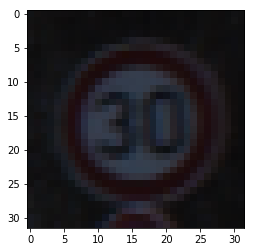

In [4]:
example_img = X_test[0]
example_img = cv2.cvtColor(example_img, cv2.COLOR_BGR2RGB)
plt.imshow(example_img)

## Visualize the dataset

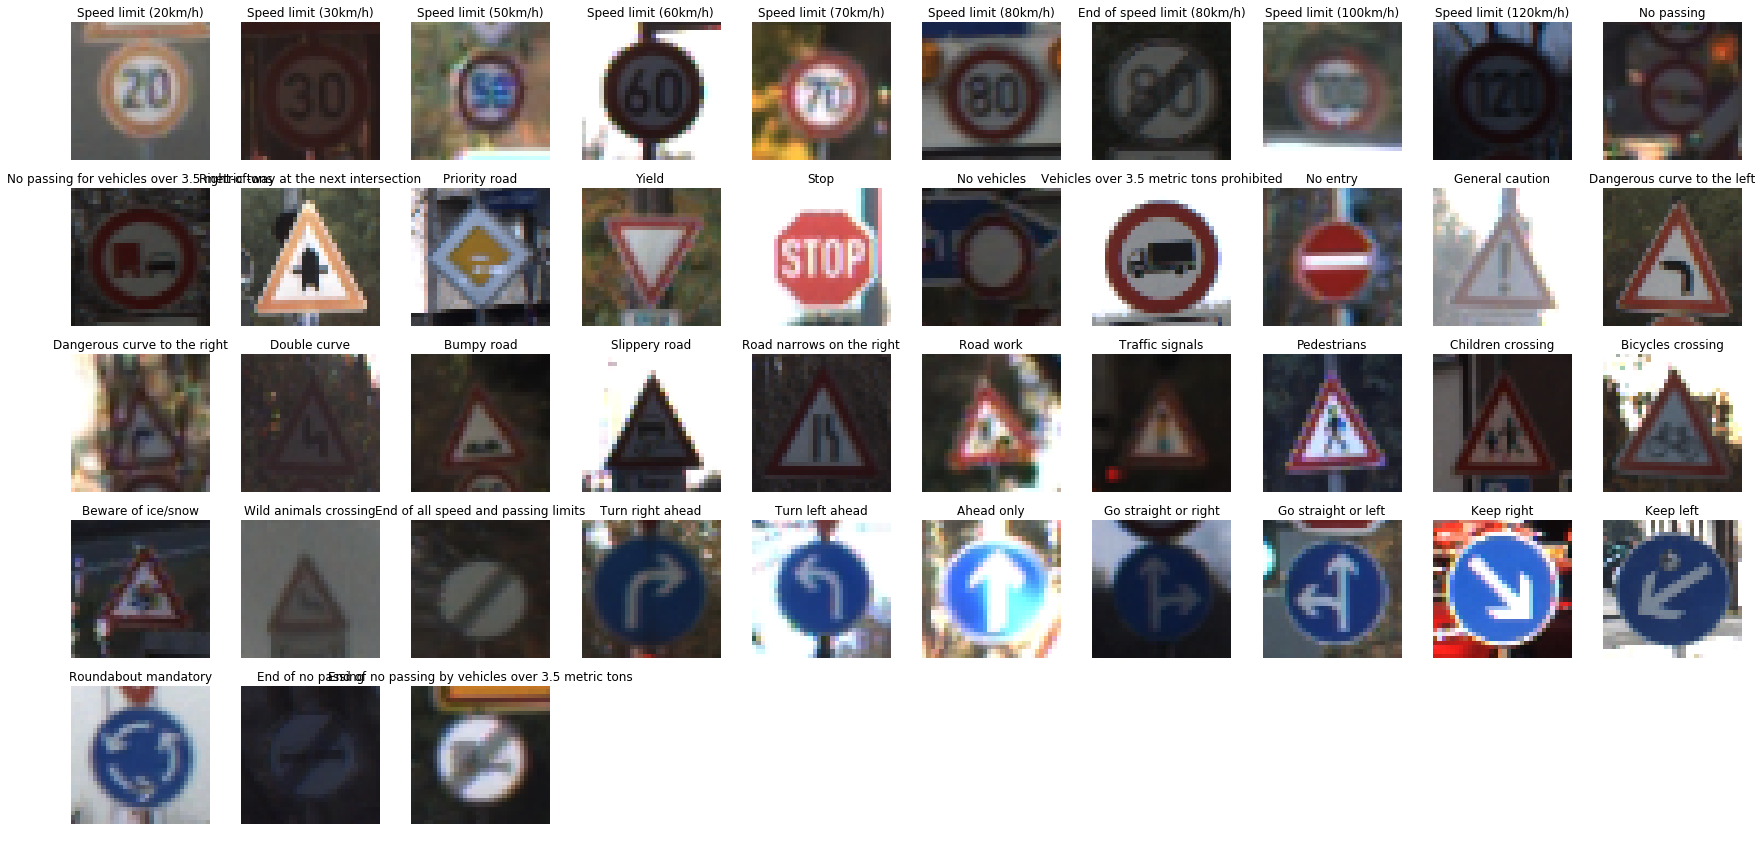

TypeError: unsupported operand type(s) for -: 'str' and 'float'

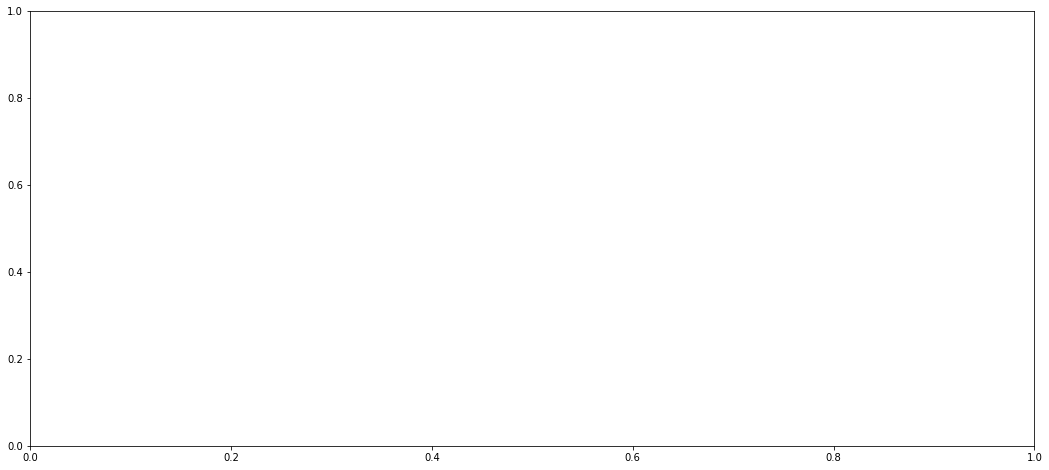

In [5]:
fig = plt.figure(figsize=(30, 30))
classes_count = []

labels, indices = np.unique(y_train, return_index=True)

# Render one image from each of the calsses
label_name = []
with open('./signnames.csv', 'rt') as f:
    reader = csv.reader(f)
    label_name = list(reader)
    
    for i, val in enumerate(indices):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        plt.title(label_name[y_train.astype(np.int)[val]+1][1])
        example_img = cv2.cvtColor(X_train[val], cv2.COLOR_BGR2RGB)
        plt.imshow(example_img)
f.close()
plt.show()


# Print the distribution of the training data
sign_name = []
for i in labels.astype(np.int):
    classes_count.append(np.sum(y_train == i))
    sign_name.append(label_name[i+1][1])

plt.figure(figsize=(18, 8))
plt.bar(sign_name, classes_count, fc='r')
plt.xticks(rotation=90)
plt.title('Distribution of training to classes', fontsize=20)

In [4]:
EPOCHS = 50
BATCH_SIZE = 128

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 30x30x32. Output = 15x15x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 15x15x32. Output = 13x13x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 13x13x64. Output = 6x6x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Dropout.
    # conv2 = tf.nn.dropout(conv2, keep_prob = 0.8)
    
    # SOLUTION: Layer 3: Convolutional. Input = 6x6x64. Output = 4x4x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 4x4x128. Output = 2x2x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Dropout.
    # conv3 = tf.nn.dropout(conv3, keep_prob = 0.7)
    
    # SOLUTION: Flatten. Input = 2x2x128. Output = 512.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 512. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(512, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Dropout.
    # fc1 = tf.nn.dropout(fc1, keep_prob = 0.6)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Dropout.
    # fc2 = tf.nn.dropout(fc2, keep_prob = 0.5)

    # SOLUTION: Layer 6: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

/home/peng/anaconda3/envs/TrafficSign/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [6]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [8]:
def normalized(data):
    return data/255.0 - 0.5

X_train_normalized = normalized(X_train)
X_valid_normalized = normalized(X_valid)
X_test_normalized  = normalized(X_test)

In [34]:
def train(X_data, y_data):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_data)
        loss_train = []
        loss_valid = []

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_data, y_data = shuffle(X_data, y_data)
            total_loss_train = 0.0
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_data[offset:end], y_data[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y}) 
                single_loss_train = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
                total_loss_train += (single_loss_train * len(batch_x))
                
            validation_accuracy = evaluate(X_valid_normalized, y_valid)
            loss_valid_epoch = sess.run(loss_operation, feed_dict={x: X_valid_normalized, y: y_valid})
            loss_valid.append(loss_valid_epoch)
            loss_train.append(total_loss_train / num_examples)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        plt.figure(figsize=(15,7))
        x_axix = range(1, EPOCHS+1)
        plt.plot(x_axix, loss_train, color = 'red', label='loss of training data')
        plt.plot(x_axix, loss_valid, color = 'blue', label='loss of validation data')
        plt.legend()
        plt.title('Loss History')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()
        
#         print("Loss_train history:", loss_train)
#         print("Loss_valid history:", loss_valid)
        saver.save(sess, 'save/model.ckpt')
        print("Model saved")

In [11]:
def test():
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('save/'))

        test_accuracy = evaluate(X_test_normalized, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

        y_predict = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test_normalized})
        precision = metrics.precision_score(y_test, y_predict, average=None)
        recall = metrics.recall_score(y_test, y_predict, average=None)

        plt.figure(figsize=(15, 7))
        plt.bar(range(43), precision, fc=(0.25,0.44,0.8))
        plt.title('Precision for each traffic signs types', fontsize=16)

        plt.figure(figsize=(15, 7))
        plt.bar(range(43), recall, fc=(0.25,0.44,0.8))
        plt.title('Recall for each traffic signs types', fontsize=16)

In [15]:
import sys
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os.path


# Provide some random effects. 
class ImageEffect:

    def random_effect(self, img):
        a = np.random.randint(0, 2, [1, 5]).astype('bool')[0]

        if a[0] == True:
            img = self.image_translate(img)
        if a[1] == True:
            img = self.image_rotate(img)
        if a[2] == True:
            img = self.image_shear(img)
        if a[3] == True:
            img = self.image_blur(img)
        if a[4] == True:
            img = self.image_gamma(img)
        return img

    
    def image_translate(self, img):
        x = img.shape[0]
        y = img.shape[1]

        x_shift = np.random.uniform(-0.3 * x, 0.3 * x)
        y_shift = np.random.uniform(-0.3 * y, 0.3 * y)

        shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
        shift_img = cv2.warpAffine(img, shift_matrix, (x, y))

        return shift_img


    def image_rotate(self, img):
        row, col, channel = img.shape

        angle = np.random.uniform(-45, 45)
        rotation_point = (row / 2, col / 2)
        rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, 1)

        rotated_img = cv2.warpAffine(img, rotation_matrix, (col, row))
        return rotated_img


    def image_shear(self, img):
        x, y, channel = img.shape

        shear = np.random.randint(5,15)
        pts1 = np.array([[5, 5], [20, 5], [5, 20]]).astype('float32')
        pt1 = 5 + shear * np.random.uniform() - shear / 2
        pt2 = 20 + shear * np.random.uniform() - shear / 2
        pts2 = np.float32([[pt1, 5], [pt2, pt1], [5, pt2]])

        M = cv2.getAffineTransform(pts1, pts2)
        shear_img = cv2.warpAffine(img, M, (y, x))
        return shear_img


    def image_blur(self, img):
        r_int = np.random.randint(0, 4)
        odd_size = 2 * r_int + 1
        blur_img = cv2.GaussianBlur(img, (odd_size, odd_size), 0)
        return blur_img
    
    
    def image_gamma(self, img):
        gamma = np.random.uniform(0.2, 5)
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        gamma_img = cv2.LUT(img, table)
        return gamma_img

In [16]:
image_effect = ImageEffect()

def augment_data(X_train, y_train, scale=3):
    traffic_sign_type         = len(set(y_train))
    sign_label, imgs_per_sign = np.unique(y_train, return_counts=True)
    avg_per_sign              = np.ceil(np.mean(imgs_per_sign)).astype('int')
    separated_data            = []
    
    for traffic_sign in range(traffic_sign_type):
        images_in_this_sign = X_train[y_train == traffic_sign, ...]
        separated_data.append(images_in_this_sign)
    
    expanded_data   = np.array(np.zeros((1, 32, 32, 3)))
    expanded_labels = np.array([0])
    
    for sign, sign_images in enumerate(separated_data):
        scale_factor = (scale*(avg_per_sign.astype(float) / imgs_per_sign[sign])).astype('int')
        print(sign, " ", avg_per_sign.astype(float) / imgs_per_sign[sign], " ", scale_factor)
        
        new_images = []
        
        for img in sign_images:
            for _ in range(scale_factor):
                new_images.append(image_effect.random_effect(img))
        
        if len(new_images) > 0:
            sign_images = np.concatenate((sign_images, new_images), axis=0)
        
        new_labels = np.full(len(sign_images), sign, dtype='uint8')
        
        expanded_data = np.concatenate((expanded_data, sign_images), axis=0)
        expanded_labels = np.concatenate((expanded_labels, new_labels), axis=0)
        
    return expanded_data[1:], expanded_labels[1:]

In [15]:
X_train_expanded, y_train_expanded = augment_data(X_train, y_train)

0   4.34285714286   13
1   0.410810810811   1
2   0.405333333333   1
3   0.646808510638   1
4   0.460606060606   1
5   0.490322580645   1
6   2.17142857143   6
7   0.633333333333   1
8   0.646808510638   1
9   0.620408163265   1
10   0.453731343284   1
11   0.690909090909   2
12   0.434285714286   1
13   0.422222222222   1
14   1.16923076923   3
15   1.44761904762   4
16   2.17142857143   6
17   0.821621621622   2
18   0.76   2
19   4.34285714286   13
20   2.53333333333   7
21   2.76363636364   8
22   2.33846153846   7
23   1.78823529412   5
24   3.37777777778   10
25   0.608   1
26   1.52   4
27   3.8   11
28   1.68888888889   5
29   3.37777777778   10
30   2.02666666667   6
31   1.16923076923   3
32   3.8   11
33   1.3236574746   3
34   2.17142857143   6
35   0.76   2
36   2.33846153846   7
37   4.34285714286   13
38   0.440579710145   1
39   3.04   9
40   2.53333333333   7
41   3.8   11
42   3.8   11


In [17]:
X_train_expanded_normalized = normalized(X_train_expanded)

In [18]:
# np.save("./Load Data/X_train_expanded_normalized.npy", X_train_expanded_normalized)
# np.save("./Load Data/y_train_expanded.npy", y_train_expanded)

In [17]:
X_data = np.load("./Load Data/X_train_expanded_normalized.npy")
y_data = np.load("./Load Data/y_train_expanded.npy")

Training...

EPOCH 1 ...
Validation Accuracy = 0.820

EPOCH 2 ...
Validation Accuracy = 0.883

EPOCH 3 ...
Validation Accuracy = 0.925

EPOCH 4 ...
Validation Accuracy = 0.917



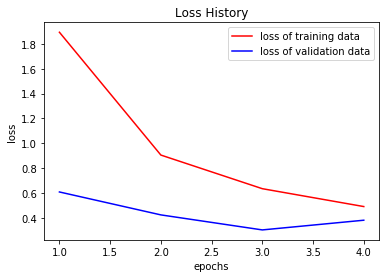

Model saved


In [33]:
train(X_data, y_data)

INFO:tensorflow:Restoring parameters from save/model.ckpt
Test Accuracy = 0.961


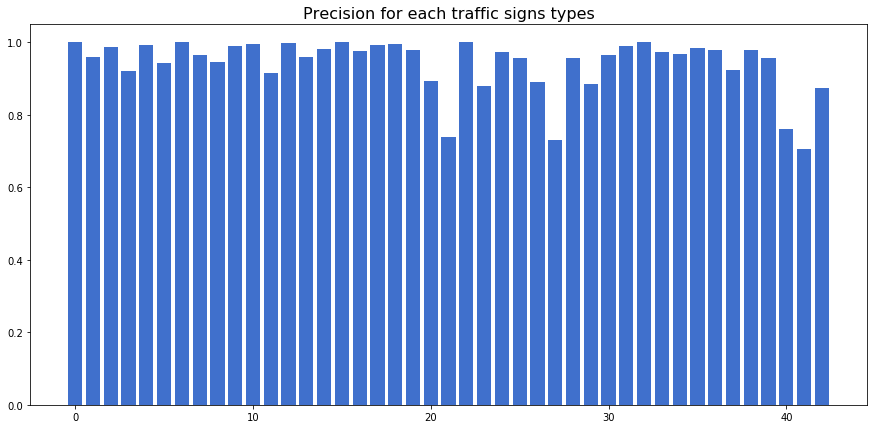

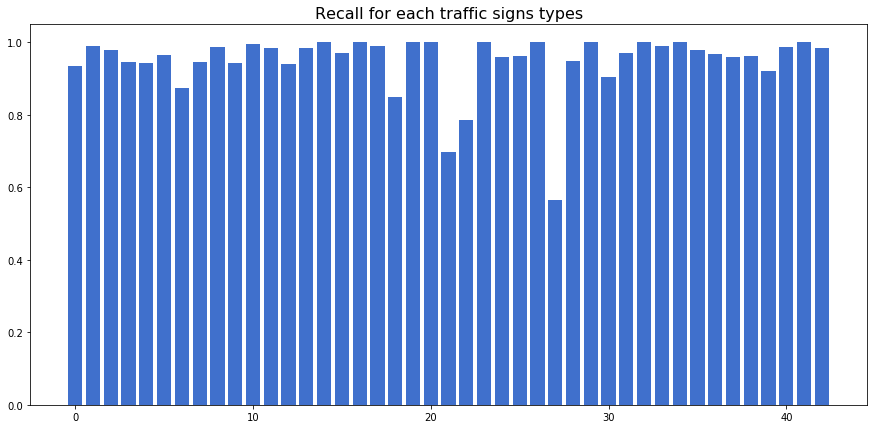

In [10]:
test()